# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import random
from config import api_key
import sys

#Import citipy for generation of random cities
from citipy import citipy

## Generate Cities List

In [3]:
#Create list of 500 random countries using citipy

# Latitude and longtitude max and min
latmin = -90
latmax = 90

longmin = -180
longmax = 180

# Set a count to get 500 cities and open empty list to add cities and countries
count = 0
cities = []

#Generate random latitude and longitude coordinates
while count < 600:
    lat = random.uniform(latmin, latmax)
    long = random.uniform(longmin, longmax)

#Find nearest city to those latitude and longitude values using citypy
    loc = citipy.nearest_city(lat, long)
    city = loc.city_name
    if city: 
        if city not in cities:
            cities.append(city)
            count = count + 1
        else:
            pass

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

# set up lists to hold reponse info
country = []
city_name = []
lat = []
long = []
temperature =[]
humidity =[]
cloudiness =[]
wind_speed =[]

count = 0
#Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        count = count + 1
        print(f"City Number {count} : {city} found! Appending data")
    
    except:
        print("City not found")
        pass

City not found
City Number 1 : longyearbyen found! Appending data
City Number 2 : atuona found! Appending data
City Number 3 : kutum found! Appending data
City Number 4 : nanortalik found! Appending data
City Number 5 : kapaa found! Appending data
City not found
City Number 6 : ushuaia found! Appending data
City Number 7 : buraydah found! Appending data
City Number 8 : prieska found! Appending data
City Number 9 : bengkulu found! Appending data
City Number 10 : atbasar found! Appending data
City Number 11 : montepuez found! Appending data
City Number 12 : hilo found! Appending data
City Number 13 : new norfolk found! Appending data
City Number 14 : bambous virieux found! Appending data
City Number 15 : busselton found! Appending data
City Number 16 : bethel found! Appending data
City Number 17 : ziyang found! Appending data
City Number 18 : mataura found! Appending data
City Number 19 : glens falls found! Appending data
City Number 20 : shingu found! Appending data
City Number 21 : sev

City Number 164 : qaqortoq found! Appending data
City Number 165 : tshikapa found! Appending data
City Number 166 : nicolas bravo found! Appending data
City Number 167 : ambon found! Appending data
City Number 168 : along found! Appending data
City Number 169 : bhachau found! Appending data
City Number 170 : nikolskoye found! Appending data
City Number 171 : puerto escondido found! Appending data
City Number 172 : port alfred found! Appending data
City Number 173 : yeppoon found! Appending data
City Number 174 : havelock found! Appending data
City Number 175 : san patricio found! Appending data
City Number 176 : bilma found! Appending data
City Number 177 : belmonte found! Appending data
City Number 178 : topeka found! Appending data
City Number 179 : rio cauto found! Appending data
City Number 180 : casper found! Appending data
City Number 181 : kondinskoye found! Appending data
City Number 182 : totma found! Appending data
City Number 183 : sitka found! Appending data
City Number 184

City Number 328 : mayo found! Appending data
City Number 329 : lucea found! Appending data
City Number 330 : broken hill found! Appending data
City Number 331 : altay found! Appending data
City Number 332 : cartagena found! Appending data
City not found
City Number 333 : nelson bay found! Appending data
City Number 334 : iqaluit found! Appending data
City Number 335 : vila do maio found! Appending data
City Number 336 : madras found! Appending data
City Number 337 : kavaratti found! Appending data
City Number 338 : saldanha found! Appending data
City Number 339 : catarama found! Appending data
City not found
City Number 340 : tuy hoa found! Appending data
City Number 341 : sundsvall found! Appending data
City not found
City Number 342 : novaya bryan found! Appending data
City Number 343 : nouadhibou found! Appending data
City Number 344 : marsh harbour found! Appending data
City Number 345 : derzhavinsk found! Appending data
City Number 346 : bella union found! Appending data
City Numb

City Number 490 : amuntai found! Appending data
City Number 491 : sao miguel do araguaia found! Appending data
City Number 492 : jertih found! Appending data
City not found
City Number 493 : aden found! Appending data
City Number 494 : pasighat found! Appending data
City Number 495 : albemarle found! Appending data
City Number 496 : shalinskoye found! Appending data
City Number 497 : west wendover found! Appending data
City Number 498 : wellington found! Appending data
City Number 499 : verkhniye kigi found! Appending data
City Number 500 : iskateley found! Appending data
City Number 501 : high level found! Appending data
City Number 502 : sao lourenco do sul found! Appending data
City Number 503 : leningradskiy found! Appending data
City Number 504 : koulikoro found! Appending data
City Number 505 : palora found! Appending data
City Number 506 : tanta found! Appending data
City Number 507 : jinka found! Appending data
City Number 508 : kiunga found! Appending data
City Number 509 : la

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe
city_data = pd.DataFrame({
    'Country' : country,
    'City': city_name,
    'Longitude' : long,
    'Latitude': lat,
    'Temperature(F)': temperature, 
    'Humidity(%)': humidity,
    'Cloudiness(%)': cloudiness,
    'Wind_Speed(mph)': wind_speed
})

city_data.to_csv('output_data/export_city_df.csv', index=False)
city_data.head(5)

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,SJ,Longyearbyen,15.64,78.22,42.80,75,75,24.16
1,PF,Atuona,-139.03,-9.80,78.49,75,0,19.06
2,SD,Kutum,24.67,14.20,74.77,61,90,11.14
3,GL,Nanortalik,-45.24,60.14,34.36,79,2,16.60
4,US,Kapaa,-159.32,22.08,81.75,66,1,6.93


In [6]:
city_data.describe()

,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,14.474756,19.855787,63.238951,73.748644,51.848101,7.605823
std,90.388904,33.747467,16.150276,19.611169,39.156256,5.474940
min,-179.170000,-54.800000,14.110000,9.000000,0.000000,0.110000
25%,-68.510000,-8.140000,51.040000,64.000000,7.000000,3.360000
50%,21.480000,23.270000,64.760000,78.000000,51.000000,6.110000
75%,91.400000,48.920000,77.000000,88.000000,90.000000,10.290000
max,179.320000,78.220000,98.600000,100.000000,100.000000,33.330000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data[city_data["Humidity(%)"] > 100]

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

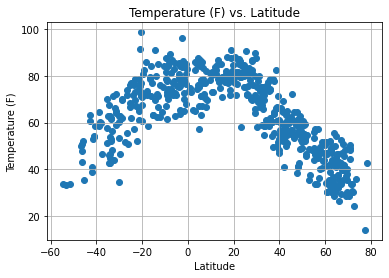

<Figure size 432x288 with 0 Axes>

In [8]:
# Temperature (F) vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Temperature(F)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig1.png')
#Scatter plot analyses the relationship between Temperature and Latitude 

## Latitude vs. Humidity Plot

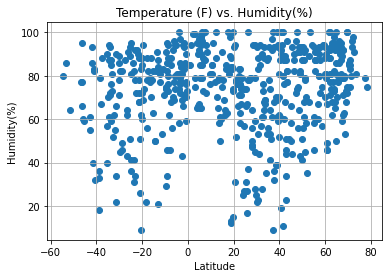

<Figure size 432x288 with 0 Axes>

In [9]:
# Humidity (%) vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Humidity(%)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig2.png')
#Scatter plot analyses the relationship between Humidity and Latitude 

## Latitude vs. Cloudiness Plot

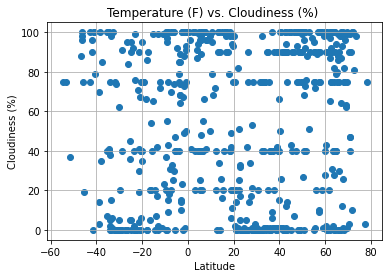

<Figure size 432x288 with 0 Axes>

In [10]:
# Cloudiness (%)  vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Cloudiness(%)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Cloudiness (%) ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig3.png')
#Scatter plot analyses the relationship between Cloudiness and Latitude 

## Latitude vs. Wind Speed Plot

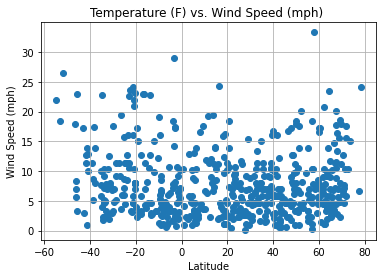

<Figure size 432x288 with 0 Axes>

In [11]:
# Wind Speed (mph)  vs. Latitude scatter plot
plt.scatter(city_data["Latitude"], city_data["Wind_Speed(mph)"], marker="o")

#Label plot
plt.title("Temperature (F) vs. Wind Speed (mph) ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig('output_data/Fig4.png')
#Scatter plot analyses the relationship between Wind Speed and Latitude 

## Linear Regression

In [12]:
#Create Nothern and Southern Hemisphere Dataframes
north_city_data = city_data[city_data["Latitude"]>=0].reset_index(drop = True)

south_city_data = city_data[city_data["Latitude"]<0].reset_index(drop = True)

south_city_data.head()

,Country,City,Longitude,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind_Speed(mph)
0,PF,Atuona,-139.03,-9.80,78.49,75,0,19.06
1,AR,Ushuaia,-68.30,-54.80,33.80,80,75,21.92
2,ZA,Prieska,22.75,-29.66,46.51,45,0,4.88
3,ID,Bengkulu,102.27,-3.80,85.57,58,85,7.16
4,MZ,Montepuez,39.00,-13.13,66.51,87,99,2.77


In [13]:
#Create function to run regression lines

def regress(x,y):
    x_label = x.columns[0]
    x = x[x_label]
    
    y_label = y.columns[0]
    y = y[y_label]
    #Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Label Axis
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, ((max(x)/1.6), (max(y)/1.5)),fontsize=15,color="red")

    # Create Plot
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")

    # Print r value
    print(f"The r-value is: {rvalue}")
    print(f"The r-value squared is: {rvalue*rvalue}")

    # Show plot
    plt.show()
    
    return;

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8667571518157691
The r-value squared is: 0.7512679602237842


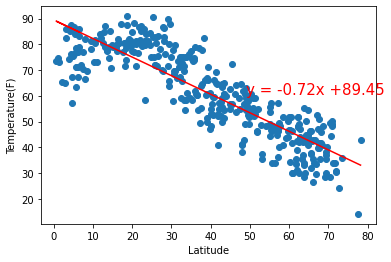

In [14]:
regress(north_city_data[["Latitude"]],north_city_data[["Temperature(F)"]])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.745627320743811
The r-value squared is: 0.555960101439594


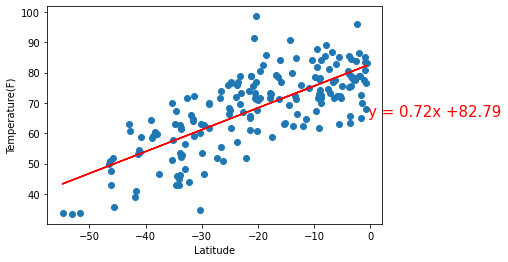

In [15]:
regress(south_city_data[["Latitude"]],south_city_data[["Temperature(F)"]])

#The r-value for both demonstrates that there is a strong negative correlation in the Northern Hemisphere 
# and a strong negative correlation in the Southern Hemisphere between latitude and temperature.
#The correlation is stronger in the Northern Hemisphere than the Southern 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08968848714012384
The r-value squared is: 0.00804402472548416


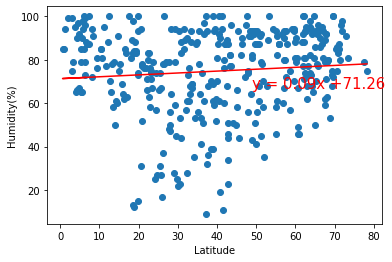

In [16]:
regress(north_city_data[["Latitude"]],north_city_data[["Humidity(%)"]])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1678400482717317
The r-value squared is: 0.028170281803857233


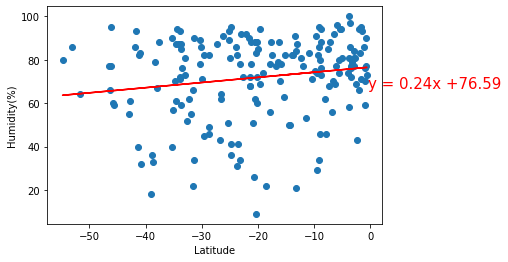

In [22]:
regress(south_city_data[["Latitude"]],south_city_data[["Humidity(%)"]])

#The r-value for both demonstrates that there is a very weak positive correlation between latitude and humidity.
#The correlation is stronger in the Southern Hemisphere than the Northern 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11060965674756167
The r-value squared is: 0.012234496165813414


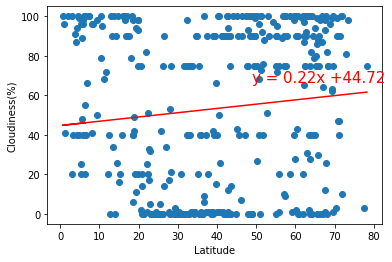

In [18]:
regress(north_city_data[["Latitude"]],north_city_data[["Cloudiness(%)"]])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041437638509214114
The r-value squared is: 0.0017170778852203046


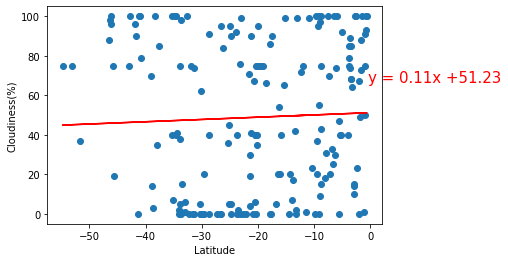

In [19]:
regress(south_city_data[["Latitude"]],south_city_data[["Cloudiness(%)"]])
#The r-value for both demonstrates that there is a very weak positive correlation between latitude and cloudiness.
#The correlation is stronger in the Northern Hemisphere than the Southern 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1467163578789476
The r-value squared is: 0.02152568966926343


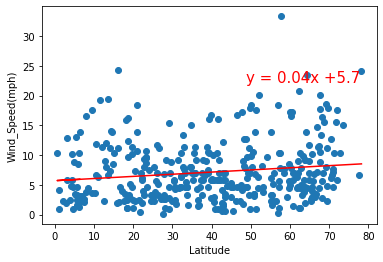

In [20]:
regress(north_city_data[["Latitude"]],north_city_data[["Wind_Speed(mph)"]])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23995838823297094
The r-value squared is: 0.05758002808336521


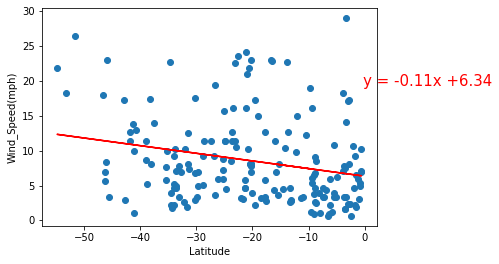

In [23]:
regress(south_city_data[["Latitude"]],south_city_data[["Wind_Speed(mph)"]])

#The r-value for both demonstrates that there is a very weak positive correlation in the northern hemisphere 
# and a weak negative correlation in the southern hemisphere between latitude and wind speed.
#The correlation is stronger in the Southern Hemisphere than the Northern 